In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv("Social_Network_Ads.csv")

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df=df.iloc[:,2:]

In [5]:
df.sample(5)

,Age,EstimatedSalary,Purchased
84,30,62000,0
342,38,65000,0
375,46,32000,1
127,26,32000,0
367,46,88000,1


Train Test Split

In [6]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(df.drop("Purchased",axis=1),df["Purchased"],test_size=0.3,random_state=0)
X_train.shape,X_test.shape

((280, 2), (120, 2))

StandardScalar

In [7]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
# fit the train data
scaler.fit(X_train)
# transform the both train and test data
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [8]:
# COMPARING BOTH DATASETS OF TRAIN DATA BEFORE AND AFTER SCALING
X_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [9]:
X_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [10]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [11]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [12]:
np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


Effect of Scaling


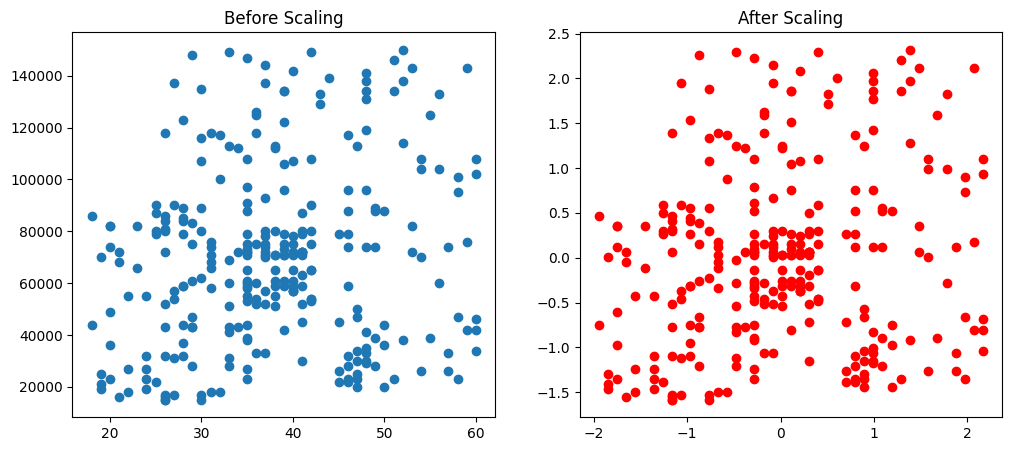

In [13]:
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(X_train["Age"],X_train["EstimatedSalary"])
ax1.set_title("Before Scaling")

ax2.scatter(X_train_scaled["Age"],X_train_scaled["EstimatedSalary"],color='Red')
ax2.set_title("After Scaling")
plt.show()

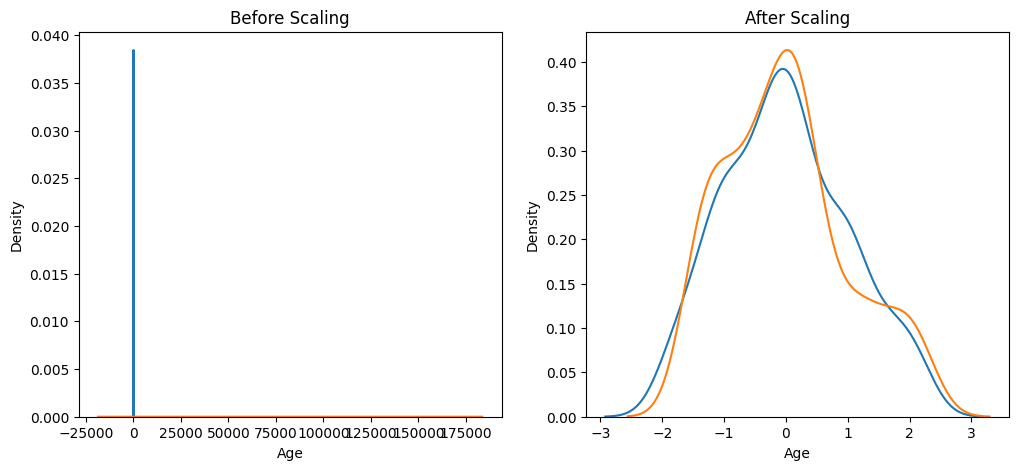

In [14]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title("Before Scaling")
sns.kdeplot(X_train["Age"],ax=ax1)
sns.kdeplot(X_train["EstimatedSalary"],ax=ax1)

ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled["Age"],ax=ax2)
sns.kdeplot(X_train_scaled["EstimatedSalary"],ax=ax2)
plt.show()

Comparison of Distributions

<Axes: title={'center': 'Age after scaling'}, xlabel='Age', ylabel='Density'>

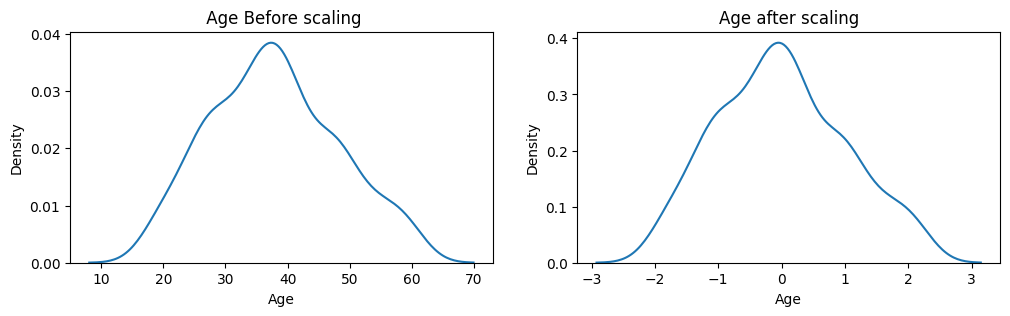

In [16]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,3))

ax1.set_title(" Age Before scaling")
sns.kdeplot(X_train["Age"],ax=ax1)

ax2.set_title("Age after scaling")
sns.kdeplot(X_train_scaled["Age"],ax=ax2)



<Axes: title={'center': 'Salary after scaling'}, xlabel='EstimatedSalary', ylabel='Density'>

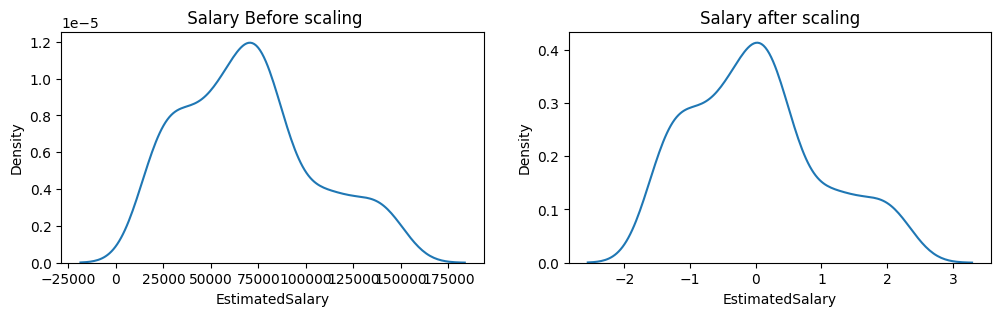

In [17]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,3))

ax1.set_title(" Salary Before scaling")
sns.kdeplot(X_train["EstimatedSalary"],ax=ax1)

ax2.set_title("Salary after scaling")
sns.kdeplot(X_train_scaled["EstimatedSalary"],ax=ax2)

why scaling is important?
- it increases the accuracy score
- mean becomes 0 
- standard deviation becomes 1
- the range of two comparable columns lies within -1 to 1

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lr= LinearRegression()
lr_scaled=LinearRegression()

In [20]:
lr.fit(X_train,Y_train)
lr_scaled.fit(X_train_scaled,Y_train)

LinearRegression()

In [23]:
y_pred=lr.predict(X_test)
y_pred_scaled=lr_scaled.predict(X_test_scaled)

In [24]:
from sklearn.metrics import accuracy_score

In [28]:
Y_test.shape


(120,)

In [29]:
y_pred.shape

(120,)

In [26]:
print("Actual",accuracy_score(Y_test,y_pred))
print("Scaled",accuracy_score(Y_test,y_pred_scaled))

ValueError: Classification metrics can't handle a mix of binary and continuous targets